# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

%matplotlib inline

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [5]:
df.loan_status.describe()

count        68817
unique           2
top       low_risk
freq         68470
Name: loan_status, dtype: object

# Integer Encoding

In [6]:
# Fitting and encoding the columns with the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
le = LabelEncoder()

# Transform Columns:
for each_col in df.columns:
    col_name = str(each_col)
    
    if df[col_name].dtype == 'O':
        le.fit(df[col_name])
        df[col_name] = le.transform(df[col_name])
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,3,66000.0,1,2,1,0,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,0,0
1,25000.0,0.2000,929.09,1,105000.0,2,2,1,0,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,0,0
2,20000.0,0.2000,529.88,1,56000.0,2,2,1,0,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,0,0
3,10000.0,0.1640,353.55,3,92000.0,2,2,1,0,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,0,0
4,22000.0,0.1474,520.39,1,52000.0,0,2,1,0,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,0,0


In [7]:
# df.info()

## Split the Data into Training and Testing

In [8]:
# Create our features
x_cols = [i for i in df.columns if i not in ('loan_status')]
X = df[x_cols]

# Create our target
y = df['loan_status']

In [9]:
X.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,3,66000.0,1,2,0,27.24,0.0,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,0,0
1,25000.0,0.2000,929.09,1,105000.0,2,2,0,20.23,0.0,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,0,0
2,20000.0,0.2000,529.88,1,56000.0,2,2,0,24.26,0.0,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,0,0
3,10000.0,0.1640,353.55,3,92000.0,2,2,0,31.44,0.0,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,0,0
4,22000.0,0.1474,520.39,1,52000.0,0,2,0,18.76,0.0,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,0,0


In [10]:
X.describe()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
count,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.0,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,1.812779,8.821371e+04,0.669994,0.805542,0.0,21.778153,0.217766,...,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.0,0.0
std,10277.348590,0.048130,288.062432,0.941313,1.155800e+05,0.719105,0.714932,0.0,20.199244,0.718367,...,8.326426,33.631463,0.336732,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.0,0.0
min,1000.000000,0.060000,30.890000,0.000000,4.000000e+01,0.000000,0.000000,0.0,0.000000,0.000000,...,20.000000,0.000000,0.000000,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.0,0.0
25%,9000.000000,0.088100,265.730000,1.000000,5.000000e+04,0.000000,0.000000,0.0,13.890000,0.000000,...,93.000000,0.000000,0.000000,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,0.0,0.0
50%,15000.000000,0.118000,404.560000,1.000000,7.300000e+04,1.000000,1.000000,0.0,19.760000,0.000000,...,100.000000,20.000000,0.000000,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,0.0,0.0
75%,24000.000000,0.155700,648.100000,3.000000,1.040000e+05,1.000000,1.000000,0.0,26.660000,0.000000,...,100.000000,50.000000,0.000000,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,0.0,0.0
max,40000.000000,0.308400,1676.230000,3.000000,8.797500e+06,2.000000,2.000000,0.0,999.000000,18.000000,...,100.000000,100.000000,4.000000,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,0.0,0.0


In [11]:
# Check the balance of our target values
y.value_counts()

1    68470
0      347
Name: loan_status, dtype: int64

In [12]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [13]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [14]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = data_scaler.fit(X_train)

In [15]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [16]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [17]:
# Calculated the balanced accuracy score
y_pred_brf = brf.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_brf)

0.7632971544371523

In [18]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_brf)

array([[   57,    30],
       [ 2201, 14917]], dtype=int64)

In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.03      0.66      0.87      0.05      0.76      0.56        87
          1       1.00      0.87      0.66      0.93      0.76      0.58     17118

avg / total       0.99      0.87      0.66      0.93      0.76      0.58     17205



In [27]:
# List of the features sorted in descending order by feature importance
importances_df = pd.DataFrame(zip(brf.feature_importances_, X.columns))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=False) 
importances_sorted.head(10)

,Feature Importances
1,
total_rec_prncp,0.081379
last_pymnt_amnt,0.064185
total_pymnt_inv,0.062959
total_pymnt,0.057137
total_rec_int,0.047660
int_rate,0.026703
issue_d,0.023494
annual_inc,0.018585
installment,0.018334


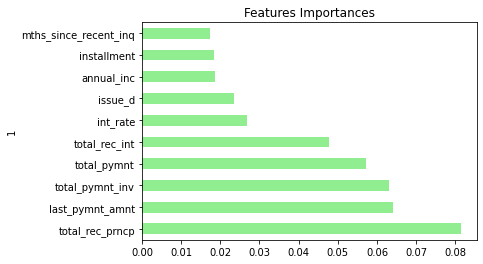

In [21]:
# Visualize the features by importance
importances_sorted.head(10).plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Easy Ensemble Classifier

In [29]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier
ee = EasyEnsembleClassifier(n_estimators=100, random_state=1)
ee.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [30]:
# Calculated the balanced accuracy score
y_pred_ee = ee.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_ee)

0.9247263417012139

In [31]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_ee)

array([[   79,     8],
       [ 1003, 16115]], dtype=int64)

In [32]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_ee))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.07      0.91      0.94      0.14      0.92      0.85        87
          1       1.00      0.94      0.91      0.97      0.92      0.86     17118

avg / total       0.99      0.94      0.91      0.97      0.92      0.86     17205



### Final Questions

1. Which model had the best balanced accuracy score?

    The Easy Ensemble Classifier has the higher balanced accuracy score (0.9247) vs. balanced random forest  (0.7633)

2. Which model had the best recall score?

    The Easy Ensemble Classifier has the higher recall score

3. Which model had the best geometric mean score?

    The Easy Ensemble Classifier has the geometric mean score

4. What are the top three features?

   <br>total_rec_prncp<br>last_pymnt_amnt<br>total_pymnt_inv